# 项目一：探索未来气候发展趋势

（待修改点：x 轴的刻度跨度有点大，不太容易观察，建议将刻度适当调整，使用 plt.xticks() 可以调整 x 轴的刻度）

## 一）项目概览
分析本地和全球的气温数据，并比较我所在城市（上海）的气温走向与全球气温走向。

## 二）数据提取
- 编写SQL查询，从数据库提取全球气温数据，并导出到CSV文件global_data.csv
```
SELECT *
FROM global_data
;
```

- 编写SQL查询，从数据库提取上海气温数据，并导出到CSV文件shanghai_data.csv
```
SELECT *
FROM city_data
WHERE city = 'Shanghai'
;
```

## 三）数据导入与分析
使用`python`的数据分析模块`pandas`读取csv文件，并进行数据处理。

### 3.1. 原始数据分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 全球年平均气温数据
global_data = pd.read_csv('data/global_data.csv')

# 上海年平均气温数据
sh_data = pd.read_csv('data/shanghai_data.csv')

In [3]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [4]:
sh_data.head()

,year,city,country,avg_temp
0,1841,Shanghai,China,14.87
1,1842,Shanghai,China,15.43
2,1843,Shanghai,China,15.53
3,1844,Shanghai,China,15.33
4,1845,Shanghai,China,15.43


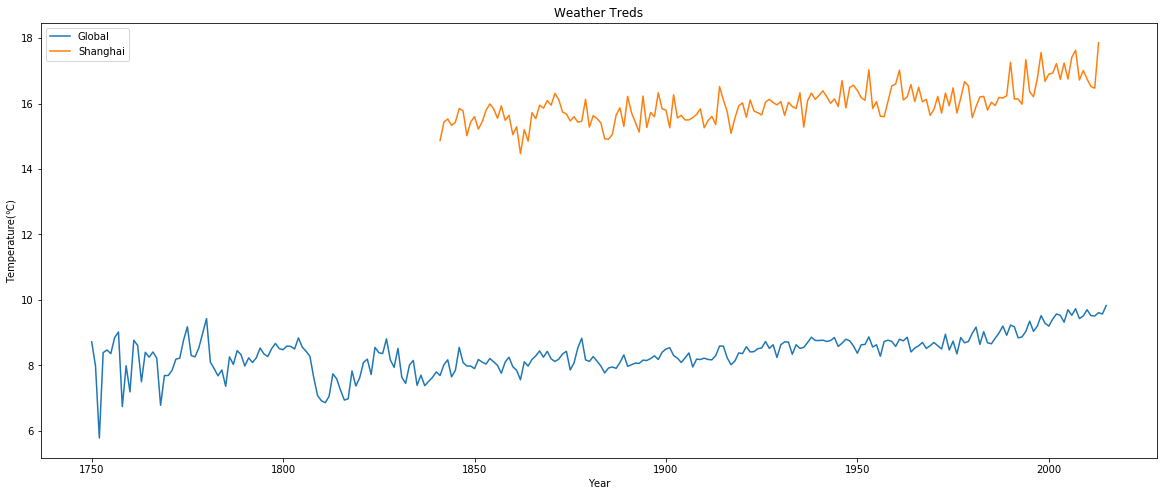

In [5]:
# 上海年平均温度与全球年平均温度对比折线图
plt.figure(figsize=(20,8))
plt.plot(global_data.year, global_data.avg_temp, label='Global')
plt.plot(sh_data.year, sh_data.avg_temp, label='Shanghai')
plt.legend()
plt.title('Weather Treds')
plt.xlabel('Year')
plt.ylabel('Temperature(℃)')
plt.show()

观察上图可知，年平均气温数值**波动较大**，趋势不明显，不便于分析预测。

为了消除和减弱时间序列中的不规则变动，使图像更平滑，从而更好的揭示气温的变化趋势，可以对数据进行**移动平均值**处理。

### 3.2. 移动平均值处理

在pandas中对数据进行**移动平均值**求解，可以使用如下方法：
1. `DataFrame.rolling(window=n, center=False).mean()`
2. `Series.rolling(window=n, center=False).mean()`

下面对全球年平均气温和上海年平均气温分别求：5年移动平均温度，7年移动平均温度，10年移动平均温度，并将存储到`global_data`，`sh_data`中。

In [6]:
n = 5
global_data['moving_avg5'] = global_data['avg_temp'].rolling(window=n).mean()
sh_data['moving_avg5'] = sh_data['avg_temp'].rolling(window=n).mean()

n = 7
global_data['moving_avg7'] = global_data['avg_temp'].rolling(window=n).mean()
sh_data['moving_avg7'] = sh_data['avg_temp'].rolling(window=n).mean()

n = 10
global_data['moving_avg10'] = global_data['avg_temp'].rolling(window=n).mean()
sh_data['moving_avg10'] = sh_data['avg_temp'].rolling(window=n).mean()

In [7]:
global_data.head(10)

,year,avg_temp,moving_avg5,moving_avg7,moving_avg10
0,1750,8.72,NaN,NaN,NaN
1,1751,7.98,NaN,NaN,NaN
2,1752,5.78,NaN,NaN,NaN
3,1753,8.39,NaN,NaN,NaN
4,1754,8.47,7.868,NaN,NaN
5,1755,8.36,7.796,NaN,NaN
6,1756,8.85,7.970,8.078571,NaN
7,1757,9.02,8.618,8.121429,NaN
8,1758,6.74,8.288,7.944286,NaN
9,1759,7.99,8.192,8.260000,8.03


In [8]:
sh_data.head(10)

,year,city,country,avg_temp,moving_avg5,moving_avg7,moving_avg10
0,1841,Shanghai,China,14.87,NaN,NaN,NaN
1,1842,Shanghai,China,15.43,NaN,NaN,NaN
2,1843,Shanghai,China,15.53,NaN,NaN,NaN
3,1844,Shanghai,China,15.33,NaN,NaN,NaN
4,1845,Shanghai,China,15.43,15.318,NaN,NaN
5,1846,Shanghai,China,15.85,15.514,NaN,NaN
6,1847,Shanghai,China,15.78,15.584,15.460000,NaN
7,1848,Shanghai,China,15.02,15.482,15.481429,NaN
8,1849,Shanghai,China,15.44,15.504,15.482857,NaN
9,1850,Shanghai,China,15.60,15.538,15.492857,15.428


## 四）数据可视化

### 4.1. 全球气温的移动平均温度图

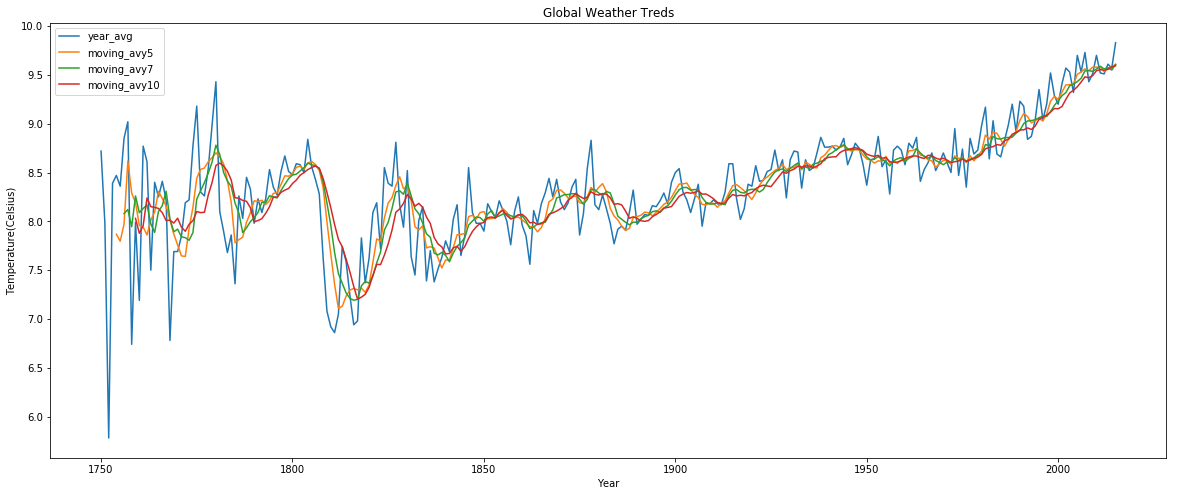

In [9]:
plt.figure(figsize=(20,8))
plt.plot(global_data.year, global_data.avg_temp, label='year_avg')
plt.plot(global_data.year, global_data.moving_avg5, label='moving_avy5')
plt.plot(global_data.year, global_data.moving_avg7, label='moving_avy7')
plt.plot(global_data.year, global_data.moving_avg10, label='moving_avy10')
plt.legend()
plt.title('Global Weather Treds')
plt.xlabel('Year')
plt.ylabel('Temperature(Celsius)')
plt.show()

观察上图可知，5年，7年，10年移动平均值均能使原图像更加平滑，并使得趋势更加明显。

### 4.2. 全球气温和上海气温对比图

* 选择**10年移动平均温度**，对**全球气温**和**上海气温**进行对比分析。

* 本次分析目的是对上海和全球气温的趋势进行对比分析，因为上海的10年移动平均温度数据在1850年以后才有，所以全球气温数据也选择1850年以后。

* 为了更容易观察温度的起伏变化，除了画出上海和全球的对比图外，再分别画出上海和全球的10年移动平均温度图。

In [10]:
global_data2 = global_data[global_data.year >= 1850]

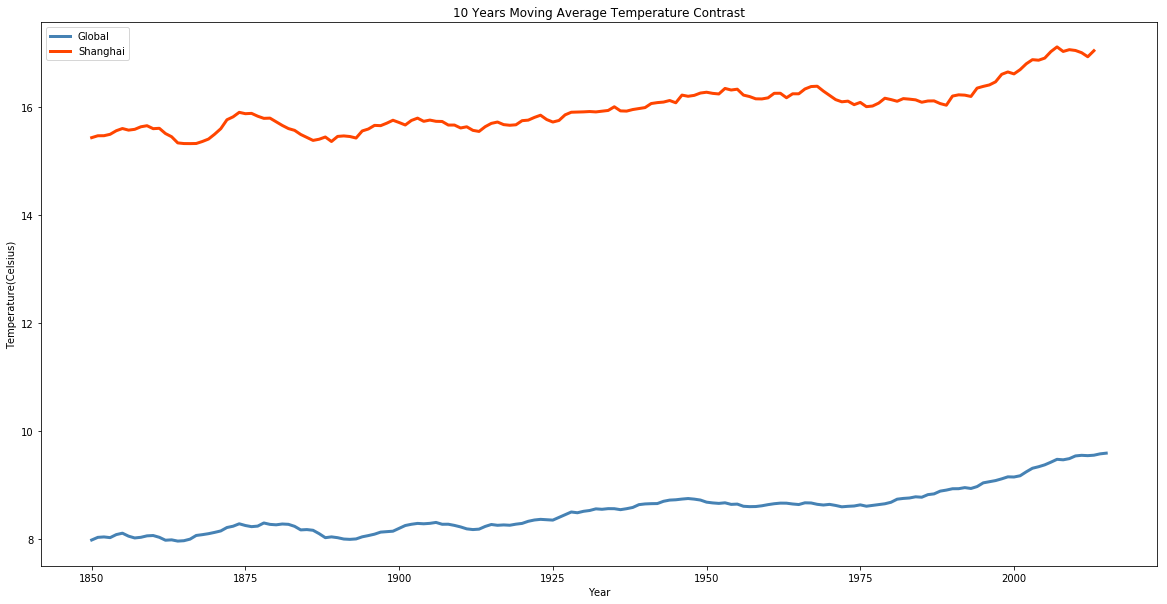

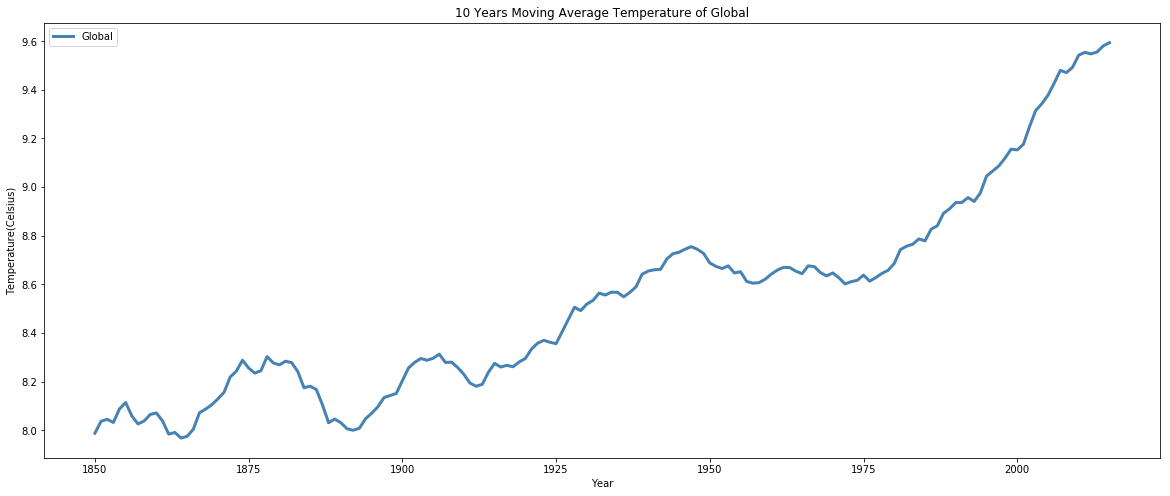

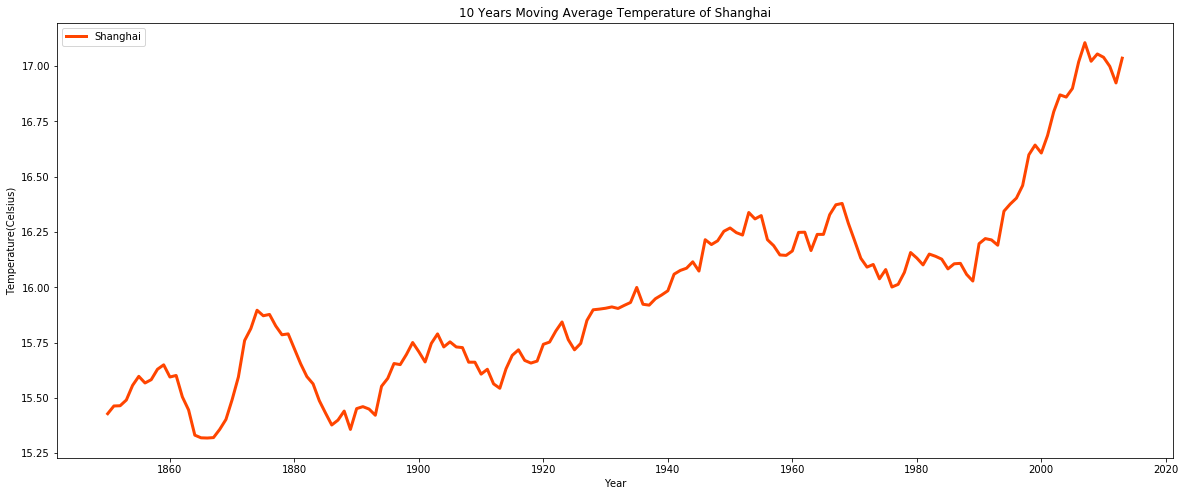

In [11]:
# 10年移动平均值对比
plt.figure(figsize=(20,10))
plt.plot(global_data2.year, global_data2.moving_avg10, label='Global', color='steelblue', linewidth=3)
plt.plot(sh_data.year, sh_data.moving_avg10, label='Shanghai', color='orangered', linewidth=3)
plt.legend()
plt.title('10 Years Moving Average Temperature Contrast')
plt.xlabel('Year')
plt.ylabel('Temperature(Celsius)')
plt.show()

# 全球气温10年移动平均值
plt.figure(figsize=(20,8))
plt.plot(global_data2.year, global_data2.moving_avg10, label='Global', color='steelblue', linewidth=3)
plt.title('10 Years Moving Average Temperature of Global')
plt.xlabel('Year')
plt.ylabel('Temperature(Celsius)')
plt.legend()
plt.show()

# 上海气温10年移动平均值
plt.figure(figsize=(20,8))
plt.plot(sh_data.year, sh_data.moving_avg10, label='Shanghai', color='orangered', linewidth=3)
plt.title('10 Years Moving Average Temperature of Shanghai')
plt.xlabel('Year')
plt.ylabel('Temperature(Celsius)')
plt.legend()
plt.show()

In [12]:
global_data2['moving_avg10'].describe()

count    166.000000
mean       8.528916
std        0.413690
min        7.968000
25%        8.207750
50%        8.552500
75%        8.700000
max        9.594000
Name: moving_avg10, dtype: float64

In [13]:
sh_data['moving_avg10'].describe()

count    164.000000
mean      15.961793
std        0.421586
min       15.318000
25%       15.649750
50%       15.908000
75%       16.200250
max       17.106000
Name: moving_avg10, dtype: float64

## 五）观察与总结
观察以上三幅10年移动平均气温值图，可以得出以下结论：

从整体来看，
1. 全球气温和上海气温从1850年到现在都属于增长态势，即温度越来越高，并且它们的起伏趋势大体一致
2. 与全球气温相比，上海的气温更高，而且这种差异长期一致，大概高出7摄氏度左右
3. 全球气温和上海气温均在最近达到高峰，分别为：9.59摄氏度，17.1摄氏度

更进一步，
1. 1912年之前，上海气温和全球气温均处于不稳定状态，都经历了三次起伏，但上海气温比全球气温变化幅度大，整体**上升趋势轻微**

2. 1912年左右，上海气温和全球气温开始第一轮长时间稳步上升，**上升趋势明显**
    - 上海气温从1912年的15.5摄氏度上升到1953年的16.3摄氏度，涨幅0.8摄氏度
    - 全球气温从1912年的8.17摄氏度上升到1947年的8.75摄氏度，涨幅约为0.58摄氏度
    
3. 第一轮升温之后经历小幅度回落，1975年左右，上海和全球气温开始了第二轮持续升温，**上升趋势显著**，明显比第一轮上升迅速
    - 上海气温从1976年的16摄氏度上升到了2013年的17摄氏度，涨幅为1摄氏度
    - 全球气温从1972年的8.6摄氏度啊涨到了2015年的9.59摄氏度，涨幅均约为1摄氏度

基于以上观察，可以合理推测**未来**全球温度和上海温度将会**持续增长**，并且上海气温比全球气温高出大约**7摄氏度**。

_声明：以上观察仅仅基于可视化分析，结论是暂时性的，需要进一步的统计分析才能证明。_

_最后修改日期：2018.01.18_